# WordCloud 단어 빈도 시각화

## WordCloud 이란
문자열 내에 단어의 빈도에 따라서 시각화를 진행합니다. 빈도가 많을 수록 글씨를 크게 표현해서 그림을 그립니다. 다음과 같은 특징을 갖습니다.

- 사용 가능한 모든 공간을 글자로 채웁니다.
- Mask를 사용해서 원하는 모양으로 만들 수 있습니다.

In [1]:
from wordcloud import WordCloud

In [15]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
%pwd

'C:\\python\\230316\\WordCloud'

In [17]:
survey_df = pd.read_csv("C:/python/datas/survey_results_public.csv",
                            index_col="ResponseId")

In [18]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [19]:
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [20]:
temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [21]:
words = ' '.join(temp_words)
words

'Data scientist or machine learning specialist Developer  front-end Engineer  data Engineer  site reliability Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  QA or test Developer  full-stack Student Developer  back-end Developer  desktop or enterprise applications Developer  mobile Educator Developer  full-stack Developer  back-end Engineering manager Developer  full-stack Developer  front-end Developer  full-stack Developer  back-end Database administrator Developer  full-stack Academic researcher DevOps specialist Developer  full-stack Developer  full-stack Engineer  data Developer  back-end Developer  desktop or enterprise applications Student Developer  full-stack Developer  back-end Other (please specify): Developer  full-stack Developer  back-end Developer  mobile Developer  full-stack Developer  back-end Developer  desktop or enterprise applications Developer  embedded applications or d

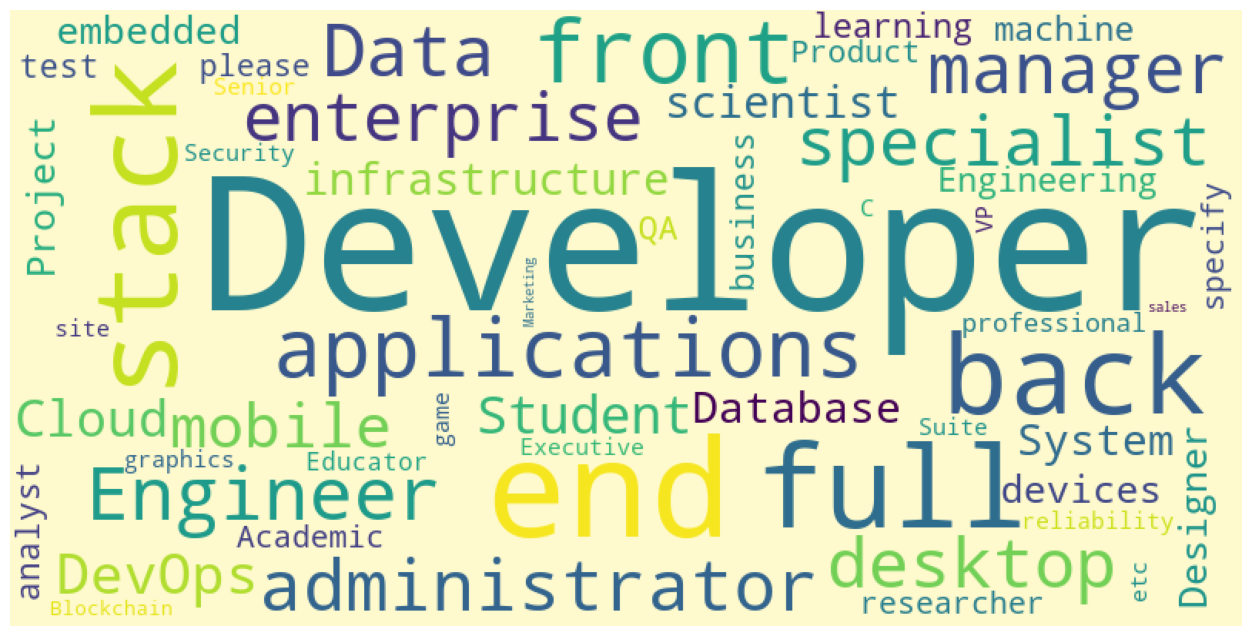

In [24]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path = ['폰트 경로']
# max_font_size = 60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400, 
               background_color='lemonchiffon').generate(words)
plt.figure(figsize=(16,8))

# x, y축을 그리지 않습니다.
plt.axis('off')

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

In [23]:
wc.to_file("DevType.png")